## Logistic Regression Model

**Reference**<br>
https://www.kaggle.com/barun2104/telecom-churn<br>
**Context**<br>
With the rapid development of telecommunication industry, the service providers are inclined more towards expansion of the subscriber base. To meet the need of surviving in the competitive environment, the retention of existing customers has become a huge challenge. It is stated that the cost of acquiring a new customer is far more than that for retaining the existing one. Therefore, it is imperative for the telecom industries to use advanced analytics to understand consumer behavior and in-turn predict the association of the customers as whether or not they will leave the company.<br>
**Content**<br>
This data set **cellphone.csv**contains customer level information for a telecom company. Various attributes related to the services used are recorded for each customer.<br>
<br>
**Data Dictionary**<br>
This data set contains customer level information for a telecom company. Various attributes related to the services used are recorded for each customer.<br>
* Churn - 1 if customer cancelled service, 0 if not<br>
* AccountWeeks - number of weeks customer has had active account.<br>
* ContractRenewal - 1 if customer recently renewed contract, 0 if not<br>
* DataPlan - 1 if customer has data plan, 0 if not.<br>
* DataUsage - gigabytes of monthly data usage<br>
* CustServCalls - number of calls into customer service<br>
* DayMins - average daytime minutes per month<br>
* DayCalls - average number of daytime calls<br>
* MonthlyCharge - average monthly bill<br>
* OverageFee - largest overage fee in last 12 months<br>
* RoamMins - average number of roaming minutes<br>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

#For logistic Regression model
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# calculate accuracy measures and confusion matrix
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

## Data pre-processing

In [2]:
# Read the csv file as a dataframe
df1 = pd.read_csv('cellphone.csv')

In [3]:
# Viewing few rows of the DataFrame
df1.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [74]:
df1.shape

(3333, 12)

#### This Dataset has 3333 rows and 12 columns

## Exploratory data analysis (EDA)

In [4]:
#Check for class imbalance of the Y variable

df1['Churn'].value_counts(normalize=True)


0    0.855086
1    0.144914
Name: Churn, dtype: float64

* Most of the customers who do not cancelled customer service
* The ratio is almost 1:2 in favor or class 0
* The model's ability to predict class 0 will be better than predicting class 1.

### Univariate Analysis

In [5]:
# Summary of AccountWeeks variable
df1['AccountWeeks'].describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: AccountWeeks, dtype: float64

In [6]:
# Summary of ContractRenewal variable
df1['ContractRenewal'].describe()

count    3333.000000
mean        0.903090
std         0.295879
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: ContractRenewal, dtype: float64

In [7]:
# Summary of DataPlan variable
df1['DataPlan'].describe()

count    3333.000000
mean        0.276628
std         0.447398
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: DataPlan, dtype: float64

In [8]:
# Summary of DataUsage variable
df1['DataUsage'].describe()

count    3333.000000
mean        0.816475
std         1.272668
min         0.000000
25%         0.000000
50%         0.000000
75%         1.780000
max         5.400000
Name: DataUsage, dtype: float64

In [9]:
# Summary of DayCalls variable
df1['DayCalls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: DayCalls, dtype: float64

In [10]:
# Summary of DayMins variable
df1['DayMins'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: DayMins, dtype: float64

In [11]:
# Summary of OverageFee variable
df1['OverageFee'].describe()

count    3333.000000
mean       10.051488
std         2.535712
min         0.000000
25%         8.330000
50%        10.070000
75%        11.770000
max        18.190000
Name: OverageFee, dtype: float64

In [12]:
# Summary of CustServCalls variable
df1['CustServCalls'].describe()

count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: CustServCalls, dtype: float64

In [13]:
# Summary of MonthlyCharge variable
df1['MonthlyCharge'].describe()

count    3333.000000
mean       56.305161
std        16.426032
min        14.000000
25%        45.000000
50%        53.500000
75%        66.200000
max       111.300000
Name: MonthlyCharge, dtype: float64

In [14]:
# Summary of RoamMins variable
df1['RoamMins'].describe()

count    3333.000000
mean       10.237294
std         2.791840
min         0.000000
25%         8.500000
50%        10.300000
75%        12.100000
max        20.000000
Name: RoamMins, dtype: float64

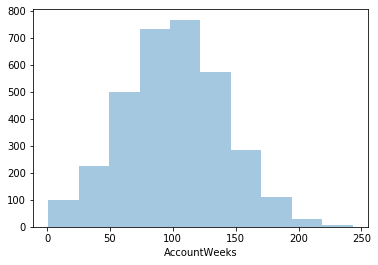

In [15]:
# Histogram for AccountWeeks 
sns.distplot(df1['AccountWeeks'],
             bins = 10, 
             kde = False);

#### The number of weeks customer has had active account(AccountWeeks) is mostly between 74 to 127.

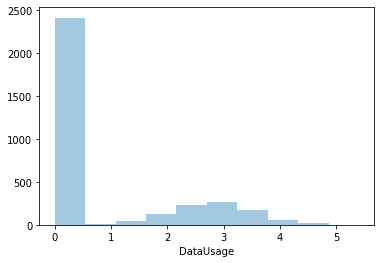

In [16]:
# Histogram for DataUsage 
sns.distplot(df1['DataUsage'],
             bins = 10, 
             kde = False);

#### The number of gigabytes of monthly data usage(DataUsage) is mostly between 0 to 1.

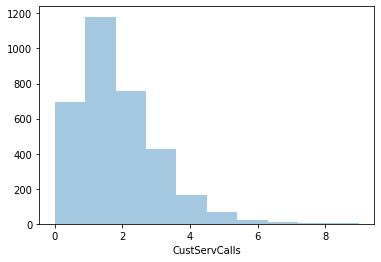

In [17]:
# Histogram for CustServCalls 
sns.distplot(df1['CustServCalls'],
             bins = 10, 
             kde = False);

#### The number of calls into customer service(CustServCalls) is mostly between 1 to 2.

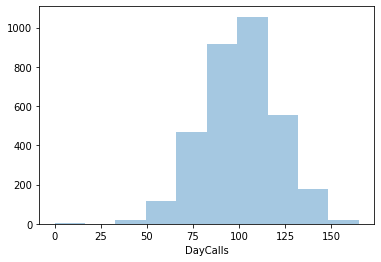

In [18]:
# Histogram for DayCalls 
sns.distplot(df1['DayCalls'],
             bins = 10, 
             kde = False);

#### The average number of daytime calls(DayCalls) is mostly between 87 to 114.

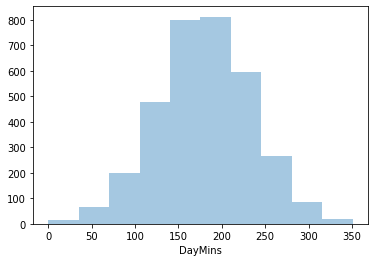

In [19]:
# Histogram for DayMins 
sns.distplot(df1['DayMins'],
             bins = 10, 
             kde = False);

#### The average daytime minutes per month(DayMins) is mostly between 143 to 216.

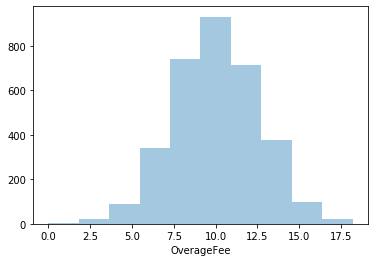

In [20]:
# Histogram for OverageFee 
sns.distplot(df1['OverageFee'],
             bins = 10, 
             kde = False);

#### The largest overage fee in last 12 months(OverageFee) is mostly between 7.5 to 11.0

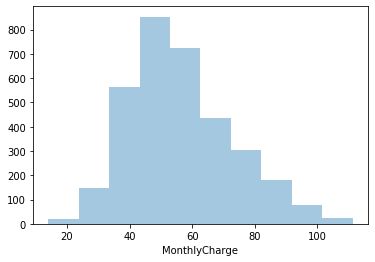

In [21]:
# Histogram for MonthlyCharge 
sns.distplot(df1['MonthlyCharge'],
             bins = 10, 
             kde = False);

#### The average monthly bill(MonthlyCharge) is mostly between 45 to 66

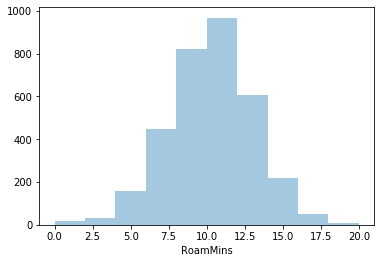

In [22]:
# Histogram for RoamMins 
sns.distplot(df1['RoamMins'],
             bins = 10, 
             kde = False);

#### The average number of roaming minutes is mostly between 8 to 12.

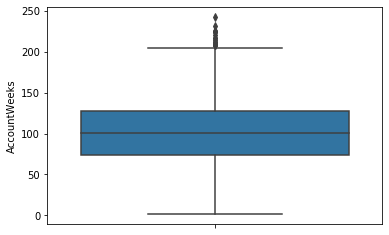

In [23]:
# Boxplot for AccountWeeks
sns.boxplot(y = df1['AccountWeeks']);

#### The median number of weeks customer has had active account(AccountWeeks) is 100.

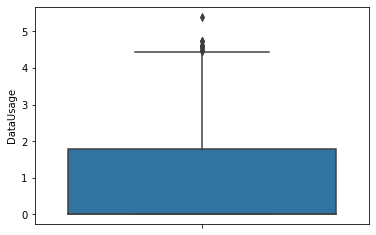

In [24]:
# Boxplot for DataUsage
sns.boxplot(y = df1['DataUsage']);

#### The median gigabytes of monthly data usage(DataUsage) is almost 0.

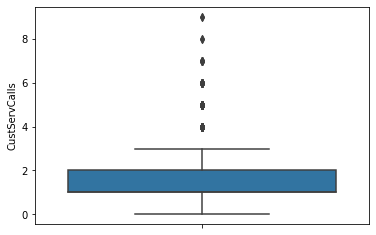

In [25]:
# Boxplot for CustServCalls
sns.boxplot(y = df1['CustServCalls']);

#### The median number of calls into customer service(CustServCalls) is 1.

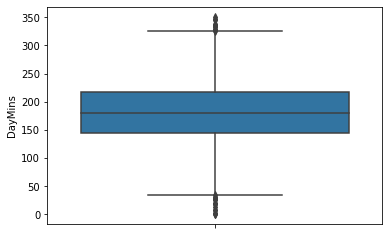

In [26]:
# Boxplot for DayMins
sns.boxplot(y = df1['DayMins']);

#### The median average daytime minutes per month(DayMins) is 179.

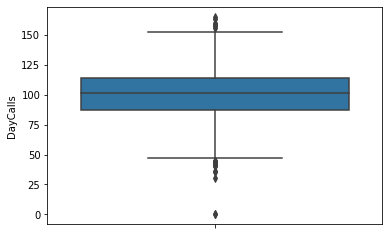

In [27]:
# Boxplot for DayCalls
sns.boxplot(y = df1['DayCalls']);

#### The median average number of daytime calls(DayCalls) is 101.

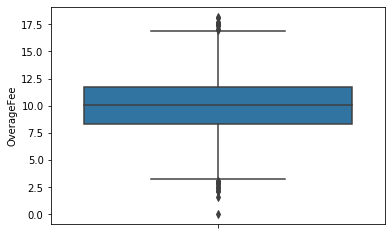

In [28]:
# Boxplot for OverageFee
sns.boxplot(y = df1['OverageFee']);

#### The median overage fee in last 12 months(OverageFee) is 10.0

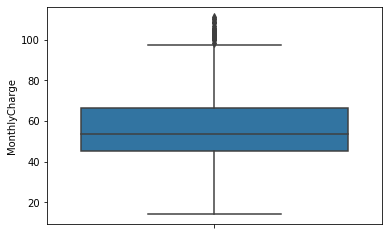

In [29]:
# Boxplot for MonthlyCharge
sns.boxplot(y = df1['MonthlyCharge']);

#### The median average monthly bill is 53

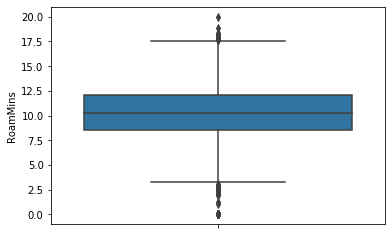

In [30]:
# Boxplot for RoamMins
sns.boxplot(y = df1['RoamMins']);

#### The median average number of roaming minutes is 10.0

In [31]:
# Number of values in ContractRenewal variable
df1['ContractRenewal'].value_counts()

1    3010
0     323
Name: ContractRenewal, dtype: int64

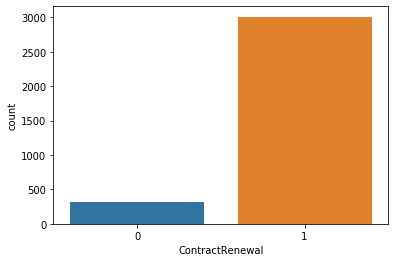

In [32]:
# Countplot for ContractRenewal variable
sns.countplot(df1['ContractRenewal']);

#### The customers recently renewed contract is higher than the customers who do not recently renew the contract.

In [33]:
# Number of values in DataPlan variable
df1['DataPlan'].value_counts()

0    2411
1     922
Name: DataPlan, dtype: int64

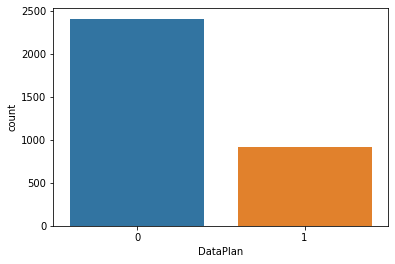

In [34]:
# Countplot for DataPlan variable
sns.countplot(df1['DataPlan']);

#### The number of customers who have a data plan is lesser than the number of customers who do not have a data plan.

In [35]:
# Number of values in Churn variable
df1['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

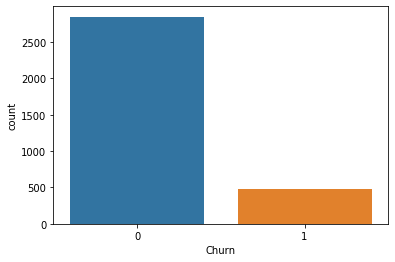

In [36]:
# Countplot for Churn variable
sns.countplot(df1['Churn']);

#### The number of customers who canceled service is lesser than the number of customers who do not cancel the services.

### Bivariate Analysis

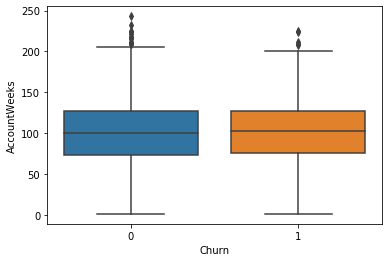

In [37]:
# Paired boxplot of Churn vs AccountWeeks
sns.boxplot(x = 'Churn', 
            y = 'AccountWeeks',
            data = df1);

#### The median number of weeks a customer has had an active account(AccountWeeks) who canceled service is the same as the median number of weeks a customer has had an active account(AccountWeeks) who do not cancel service.

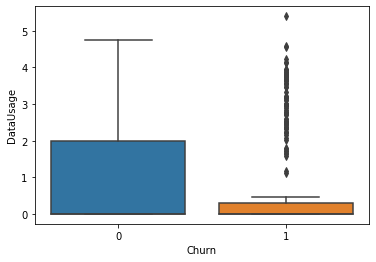

In [38]:
# Paired boxplot of Churn vs DataUsage
sns.boxplot(x = 'Churn', 
            y = 'DataUsage',
            data = df1);

#### The median gigabytes of monthly data usage(DataUsage) of customers who canceled service is the same as the median gigabytes of monthly data usage(DataUsage) of customers who do not cancel service.

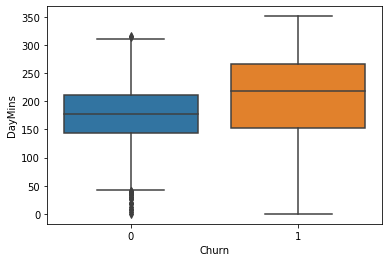

In [39]:
# Paired boxplot of Churn vs DayMins
sns.boxplot(x = 'Churn', 
            y = 'DayMins',
            data = df1);

#### The median average daytime minutes per month(DayMins) of customers who canceled service is higher than the median average daytime minutes per month(DayMins) of customers who do not cancel service.

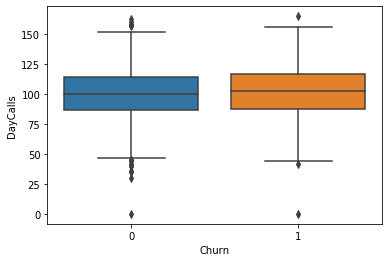

In [40]:
# Paired boxplot of Churn vs DayCalls
sns.boxplot(x = 'Churn', 
            y = 'DayCalls',
            data = df1);

#### The median average number of daytime calls(DayCalls) of customers who canceled service is slightly higher than the median average number of daytime calls(DayCalls) of customers who do not cancel service.

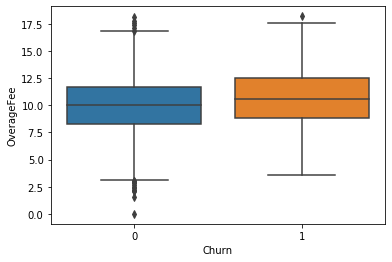

In [41]:
# Paired boxplot of Churn vs OverageFee
sns.boxplot(x = 'Churn', 
            y = 'OverageFee',
            data = df1);

#### The median overage fee in last 12 months of customers who canceled service is slightly higher than the median overage fee in last 12 months of customers who do not cancel service.

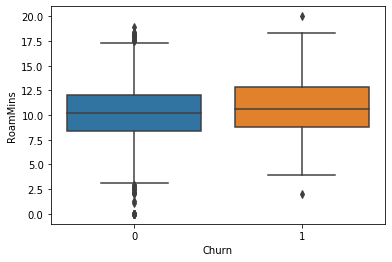

In [42]:
# Paired boxplot of Churn vs RoamMins
sns.boxplot(x = 'Churn', 
            y = 'RoamMins',
            data = df1);

#### The median average number of roaming minutes of customers who canceled service is slightly higher than the median average number of roaming minutes of customers who do not cancel service.

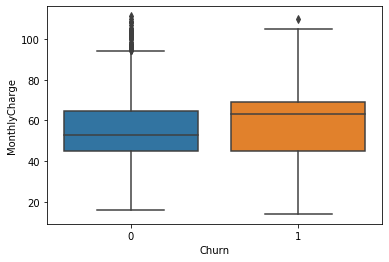

In [43]:
# Paired boxplot of Churn vs RoamMins
sns.boxplot(x = 'Churn', 
            y = 'MonthlyCharge',
            data = df1);

#### The median average monthly bill of customers who canceled service is slightly higher than the median average monthly bill of customers who do not cancel service.

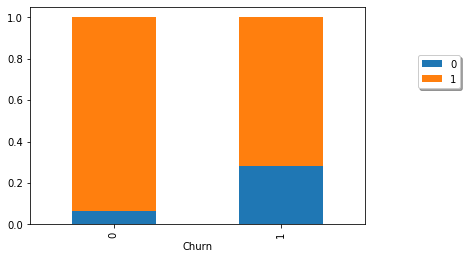

In [44]:
# Stacked bar plot for Churn vs ContractRenewal
ax = pd.crosstab(index=df1['Churn'],
            columns=df1['ContractRenewal'],
            normalize='index').plot(kind = 'bar',stacked = True);
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=1);

#### The customer recently renewed a contract(ContractRenewal) whose canceled service is higher than the customer do not recently renewed contract(ContractRenewal) whose customer canceled service.

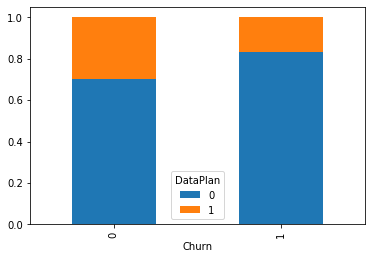

In [45]:
# Stacked bar plot for Churn vs DataPlan
pd.crosstab(index=df1['Churn'],
            columns=df1['DataPlan'],
            normalize='index').plot(kind = 'bar',stacked = True);

#### The customer does not have a data plan who canceled service is higher than the customer who has a data plan who cancels service.

In [46]:
## Collect numerical variables in a dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_df = df1.select_dtypes(include=numerics)

#Remove Y variable 
numerical_df.drop('Churn', axis=1, inplace=True)

In [47]:
# Check correlation among numerical independent variables using correlation matrix
cor = numerical_df.corr()
cor

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
AccountWeeks,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
ContractRenewal,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023
RoamMins,0.009514,-0.045871,-0.001318,0.162746,-0.009640,-0.010155,0.021565,0.117433,-0.011023,1.000000


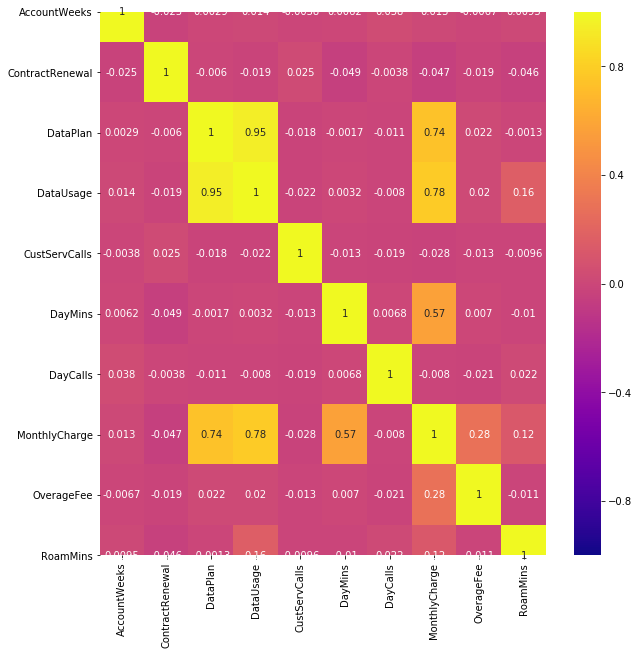

In [48]:
# View heat map of the correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor, vmin = -1, vmax = 1, cmap = 'plasma', annot = True);

In [49]:
#Highly correlated X variables
c = cor.abs()

# Unstack the correlation matrix
s = c.unstack()

#Filter to exclude values of 1
s = s[s != 1]

# Sort descending to find the highly correlated variables
so = s.sort_values(kind="quicksort", ascending=False)[:10]
so

DataUsage      DataPlan         0.945982
DataPlan       DataUsage        0.945982
DataUsage      MonthlyCharge    0.781660
MonthlyCharge  DataUsage        0.781660
DataPlan       MonthlyCharge    0.737490
MonthlyCharge  DataPlan         0.737490
DayMins        MonthlyCharge    0.567968
MonthlyCharge  DayMins          0.567968
OverageFee     MonthlyCharge    0.281766
MonthlyCharge  OverageFee       0.281766
dtype: float64

In [50]:
# Remove the High Correlated columns
data2 = df1.drop(['DataUsage','DayCalls'],axis = 1)

In [51]:
# Define X and Y variables
X = df1.drop('Churn', axis=1)
Y = df1['Churn']

In [52]:
# Build the logistic regression model
import random
random.seed(10)
logreg = sm.Logit(Y,sm.add_constant(X))
lg =logreg.fit()

Optimization terminated successfully.
         Current function value: 0.328291
         Iterations 7


In [53]:
#Summary of logistic regression
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3322
Method:                           MLE   Df Model:                           10
Date:                Thu, 25 Mar 2021   Pseudo R-squ.:                  0.2066
Time:                        14:49:56   Log-Likelihood:                -1094.2
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                4.910e-116
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.9510      0.549    -10.845      0.000      -7.026      -4.876
AccountWeeks        0.0007      0.001      0.470      0.638      -0.002       0.003
ContractRenewal    -1.9855      

#### In the main table, p value of F-stat, 4.910e-116, is well below our level of significance 0.05. So, the overall model is statistically significant and valid for estimating the population Y variable.
#### Pseudo R-Squared value of 20.6% indicates moderate explanatory power of the independent variables for changes in Y variable

In [54]:
# Display the co-efficients and p values for each independent variable
coeff = pd.DataFrame(lg.params, columns = ['coef'])
coeff['pvalue'] = lg.pvalues.round(3)

# Sort the data in descending order of coefficients to identify significant X variables
coeff.sort_values(by='coef', ascending=False, inplace=True)

#Display only significant X variables
coeff[coeff['pvalue']<=0.05]

,coef,pvalue
CustServCalls,0.508135,0.000
RoamMins,0.078923,0.000
DataPlan,-1.184161,0.027
ContractRenewal,-1.985517,0.000
const,-5.951025,0.000


In [55]:
# Collect the coef in a dataframe
lgcoef = pd.DataFrame(lg.params,columns = ['coef'])

# Calculate Odds Ratio
lgcoef['Odds_ratio'] = np.exp(lgcoef.coef)
lgcoef

,coef,Odds_ratio
const,-5.951025,0.002603
AccountWeeks,0.000652,1.000653
ContractRenewal,-1.985517,0.137310
DataPlan,-1.184161,0.306003
DataUsage,0.363657,1.438580
CustServCalls,0.508135,1.662188
DayMins,0.017441,1.017594
DayCalls,0.003652,1.003659
MonthlyCharge,-0.027553,0.972823
OverageFee,0.186811,1.205400


In [56]:
# Calculate probability
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef

,coef,Odds_ratio,probability
const,-5.951025,0.002603,0.002596
AccountWeeks,0.000652,1.000653,0.500163
ContractRenewal,-1.985517,0.137310,0.120732
DataPlan,-1.184161,0.306003,0.234305
DataUsage,0.363657,1.438580,0.589925
CustServCalls,0.508135,1.662188,0.624369
DayMins,0.017441,1.017594,0.504360
DayCalls,0.003652,1.003659,0.500913
MonthlyCharge,-0.027553,0.972823,0.493112
OverageFee,0.186811,1.205400,0.546568


In [57]:
# Calculate p value
lgcoef['pval'] = lg.pvalues

#Display rounded to 2 decimal points
pd.options.display.float_format = '{:.2f}'.format
lgcoef

,coef,Odds_ratio,probability,pval
const,-5.95,0.00,0.00,0.00
AccountWeeks,0.00,1.00,0.50,0.64
ContractRenewal,-1.99,0.14,0.12,0.00
DataPlan,-1.18,0.31,0.23,0.03
DataUsage,0.36,1.44,0.59,0.85
CustServCalls,0.51,1.66,0.62,0.00
DayMins,0.02,1.02,0.50,0.59
DayCalls,0.00,1.00,0.50,0.18
MonthlyCharge,-0.03,0.97,0.49,0.89
OverageFee,0.19,1.21,0.55,0.57


In [58]:
# Sort by descending order of odds_ratio
lgcoef = lgcoef.sort_values(by = 'Odds_ratio', ascending =  False)

# Filter to display only variables with significant p value
pval_filter = lgcoef['pval'] <= 0.05
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CustServCalls,0.51,1.66,0.62,0.00
RoamMins,0.08,1.08,0.52,0.00
DataPlan,-1.18,0.31,0.23,0.03
ContractRenewal,-1.99,0.14,0.12,0.00
const,-5.95,0.00,0.00,0.00


#### All the other variables remains constant, every increase in customers who cancelled the plan, the odds of CustServCalls increase by 1.66, the odds of RoamMins increase by 1.08, the odds of DataPlan increase by 0.31, and the odds of ContractRenenewal increase by 0.14

In [59]:
## Logistic Regression using sklearn
logreg = LogisticRegression()
logreg.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
# Coefficients of the X variables
logreg.coef_

array([[-2.98034760e-04, -1.97296448e+00, -1.11661418e+00,
         2.00704538e-01,  4.75805445e-01,  1.36235330e-02,
        -1.77829749e-04, -1.27506570e-02,  1.29663856e-01,
         5.53802189e-02]])

In [61]:
# Predicting Y class
Y_pred = logreg.predict(X)
Y_pred[1:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [62]:
# Predicting Y probability
Y_pred_prob = logreg.predict_proba(X)
Y_pred_prob[:10].round(5)

array([[0.91587, 0.08413],
       [0.96479, 0.03521],
       [0.9233 , 0.0767 ],
       [0.38576, 0.61424],
       [0.47843, 0.52157],
       [0.62835, 0.37165],
       [0.79247, 0.20753],
       [0.86808, 0.13192],
       [0.83471, 0.16529],
       [0.67734, 0.32266]])

In [63]:
# Append Y_pred_prob to original df and write a csv file for analysis
df1['pred_prob'] = Y_pred_prob[:,1]
df1.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,pred_prob
0,0,128,1,1,2.70,1,265.10,110,89.00,9.87,10.00,0.08
1,0,107,1,1,3.70,1,161.60,123,82.00,9.78,13.70,0.04
2,0,137,1,0,0.00,0,243.40,114,52.00,6.06,12.20,0.08
3,0,84,0,0,0.00,2,299.40,71,57.00,3.10,6.60,0.61
4,0,75,0,0,0.00,3,166.70,113,41.00,7.42,10.10,0.52


In [64]:
# Converting the Dataframe to a csv file for further analysis
df1.to_csv('Predicted_data_Churn.csv')

In [65]:
# Build the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [66]:
# Confusion Matrix
confusion_matrix(Y,Y_pred)

array([[2783,   67],
       [ 402,   81]], dtype=int64)

In [67]:
# Accuracy of the model
accuracy_score(Y,Y_pred)

0.8592859285928592

In [68]:
# Recall score for the model
recall_score(Y,Y_pred)

0.16770186335403728

In [69]:
# Precision score for the model
precision_score(Y,Y_pred)

0.5472972972972973

In [70]:
# The classification report for the model
print(classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2850
           1       0.55      0.17      0.26       483

    accuracy                           0.86      3333
   macro avg       0.71      0.57      0.59      3333
weighted avg       0.83      0.86      0.83      3333



In [71]:
# AUC Value
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y,Y_pred)
logit_roc_auc

0.5720965457121063

#### The AUC score is above 50%, which says that the model is able to seperate the data

(0.0, 1.05)

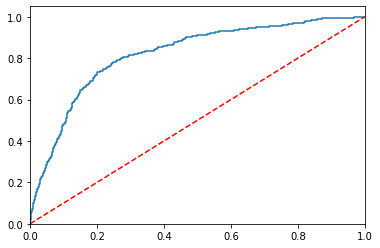

In [72]:
#Plotting the ROC Curve
fpr, tpr, threshold = roc_curve(Y,Y_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

## Optimizing Cutoff Value

In [73]:
# Predict the probability value for X
pred_proba_df = pd.DataFrame(Y_pred_prob)

# Use Cut-off value to predict the recall_score and accuracy_score.
# Predicting the recall_score, precision score and accuracy_score for cutoffs 0.2 and 0.8
cutoff_list = [0.2,0.8]
for i in cutoff_list:
    print ('\n******** For i = {} ******'.format(i))
    y_pred_prob = pd.DataFrame(np.where(pred_proba_df[pred_proba_df.columns] > i, 1, 0))
    test_recall_score = metrics.recall_score(Y.to_numpy(),y_pred_prob.iloc[:,1])
    test_acu_score = metrics.roc_auc_score(Y.to_numpy(),y_pred_prob.iloc[:,1])
    test_precision_score = metrics.precision_score(Y.to_numpy(),y_pred_prob.iloc[:,1])
    print('Our testing recall is {:.2f}'.format(test_recall_score))
    print('Our Accuracy score is {:.2f}'.format(test_acu_score))
    print('Our Precision score is {:.2f}'.format(test_precision_score))


******** For i = 0.2 ******
Our testing recall is 0.66
Our Accuracy score is 0.75
Our Precision score is 0.41

******** For i = 0.8 ******
Our testing recall is 0.02
Our Accuracy score is 0.51
Our Precision score is 0.71
